In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('car_evaluation decision tree.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"] 
df.columns = col_names

In [12]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [13]:
for i in df.columns:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


C:\Users\NINGARAJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

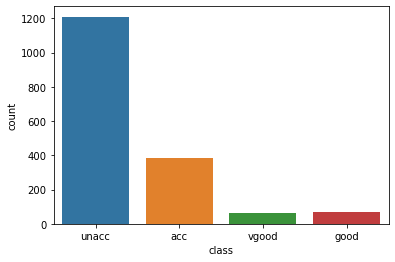

In [14]:
sns.countplot(df['class'])

In [15]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [116]:
#pip install category_encoders

In [19]:
import category_encoders as ce

In [20]:
df_encode = ce.OrdinalEncoder(df)

In [22]:
df1 = df_encode.fit_transform(df)

In [26]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


C:\Users\NINGARAJU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

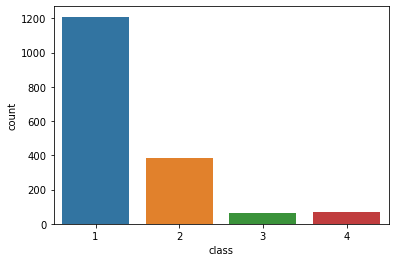

In [25]:
sns.countplot(df1['class'])

In [28]:
df1.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']], df1['class'], random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1208, 6)
y_train (1208,)
X_test (519, 6)
y_test (519,)


In [39]:
from sklearn.metrics import classification_report

In [66]:
def get_train_report(model):
    train_pred = model.predict(x_train)
    return(classification_report(y_train,train_pred))

In [67]:
def get_test_report(model):
    test_pred = model.predict(x_test)
    return(classification_report(y_test,test_pred))

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
tree_model = decision_tree.fit(x_train,y_train)

In [49]:
import pydotplus
from IPython.display import Image 
from sklearn import tree

In [52]:
import matplotlib.pyplot as plt

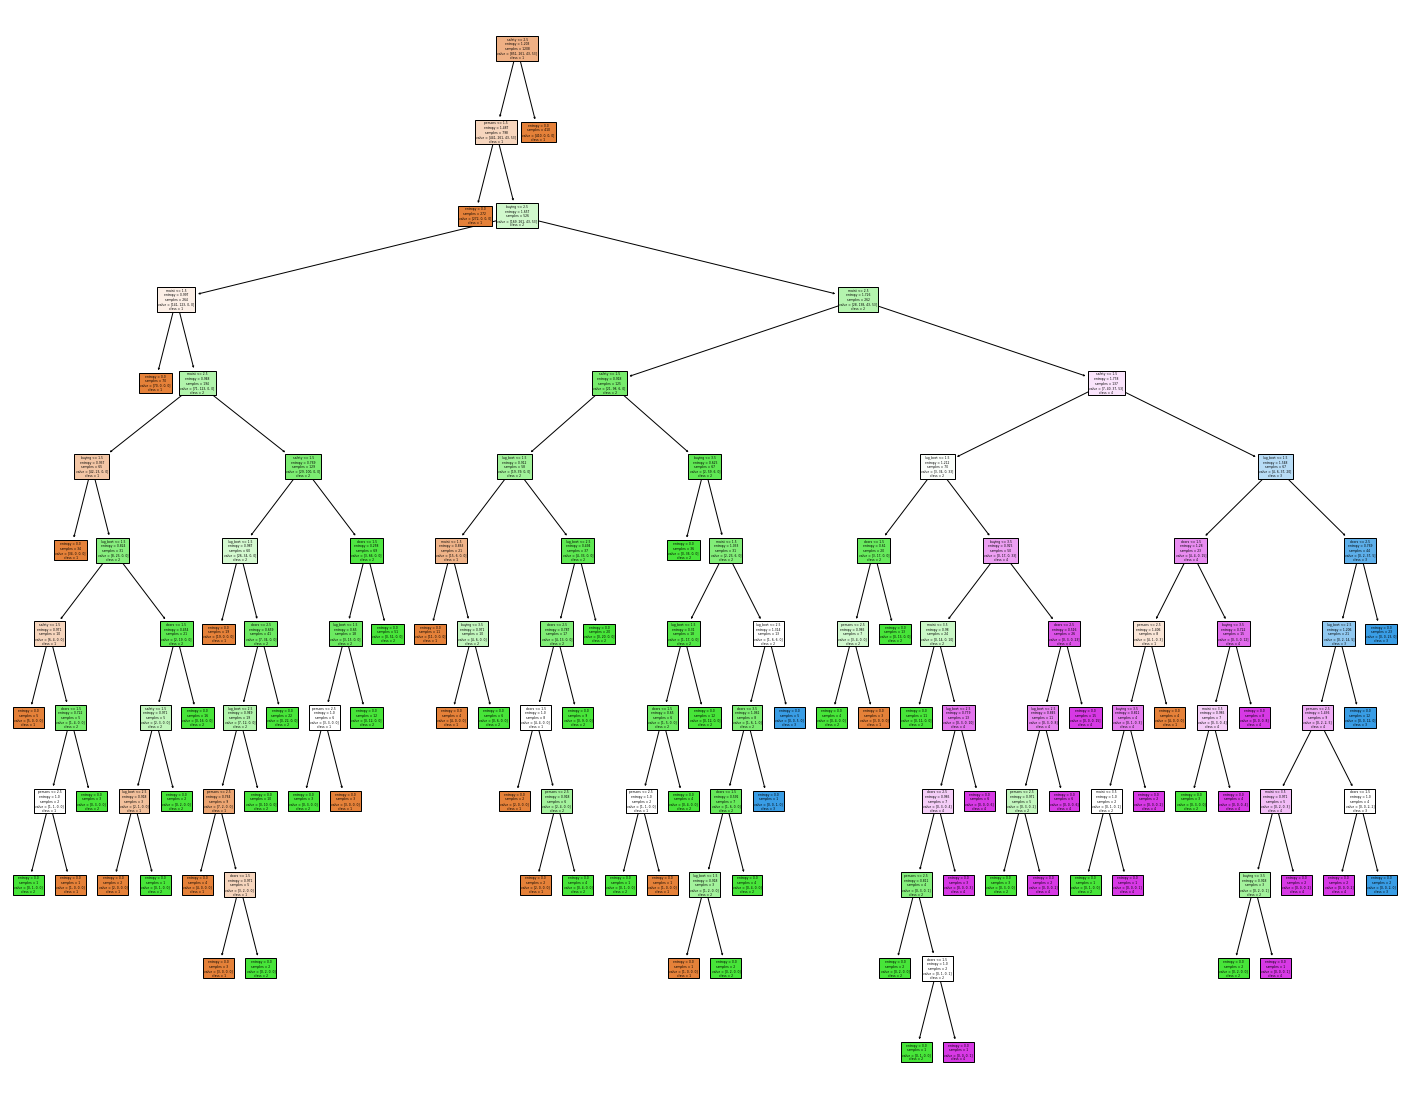

In [53]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(decision_tree,
                   feature_names=x_train.columns,  
                   class_names=["1","2","3","4"],      
                   filled=True)


In [54]:
tree_model.feature_importances_

array([0.15713128, 0.1645738 , 0.05278976, 0.24622294, 0.12352922,
       0.25575299])

In [55]:
tree_model.feature_names_in_

array(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
      dtype=object)

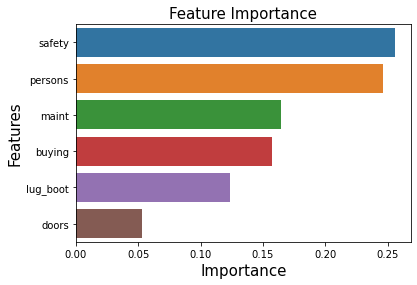

In [61]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': tree_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [69]:
train_report = get_train_report(tree_model)
print(train_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       851
           2       1.00      1.00      1.00       261
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        53

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208



In [68]:
test_report = get_test_report(tree_model)
print(test_report)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       358
           2       0.94      0.93      0.93       123
           3       0.90      0.86      0.88        22
           4       0.84      1.00      0.91        16

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



In [70]:
#this is a very good model

In [71]:
#GIni 

In [73]:
gin = DecisionTreeClassifier(criterion='gini')
gini_model = gin.fit(x_train,y_train)

In [75]:
print(get_train_report(gini_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       851
           2       1.00      1.00      1.00       261
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        53

    accuracy                           1.00      1208
   macro avg       1.00      1.00      1.00      1208
weighted avg       1.00      1.00      1.00      1208



In [76]:
print(get_test_report(gini_model))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       358
           2       0.96      0.99      0.98       123
           3       0.90      0.86      0.88        22
           4       1.00      0.94      0.97        16

    accuracy                           0.99       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.99      0.99      0.99       519



In [77]:
#by tunning

In [87]:
gin = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=4,max_leaf_nodes=5,random_state=3)
gini_model = gin.fit(x_train,y_train)

In [88]:
print(get_train_report(gini_model))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95       851
           2       0.61      0.91      0.73       261
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        53

    accuracy                           0.85      1208
   macro avg       0.40      0.46      0.42      1208
weighted avg       0.82      0.85      0.83      1208



C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print(get_test_report(gini_model))

              precision    recall  f1-score   support

           1       0.96      0.90      0.93       358
           2       0.59      0.89      0.71       123
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        16

    accuracy                           0.83       519
   macro avg       0.39      0.45      0.41       519
weighted avg       0.80      0.83      0.81       519



C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
tuned_parameters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

In [92]:
decision_tree = DecisionTreeClassifier(random_state=10)

In [93]:
tree_grid = GridSearchCV(estimator=decision_tree,param_grid=tuned_parameters,cv = 5)
tree_grid_model = tree_grid.fit(x_train,y_train)

C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
11520 fits failed out of a total of 103680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11520 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 350, in fit
    check_scalar(
  File "C:\Users\NINGARAJU\anaconda3\lib\site-packages\skle

In [94]:
tree_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [95]:
m = DecisionTreeClassifier(criterion='entropy',
 max_depth=4,
 max_features= 'sqrt',
 max_leaf_nodes= 9,
 min_samples_leaf= 1,
 min_samples_split= 2)
grid_model = m.fit(x_train,y_train)

In [96]:
print(get_train_report(grid_model))

              precision    recall  f1-score   support

           1       0.96      0.84      0.90       851
           2       0.51      0.91      0.65       261
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        53

    accuracy                           0.79      1208
   macro avg       0.37      0.44      0.39      1208
weighted avg       0.79      0.79      0.77      1208



C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print(get_test_report(grid_model))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89       358
           2       0.54      0.91      0.67       123
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        16

    accuracy                           0.79       519
   macro avg       0.37      0.44      0.39       519
weighted avg       0.79      0.79      0.77       519



C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NINGARAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest

In [99]:
rf_classification = RandomForestClassifier(n_estimators=6,random_state=10)
randome_model = rf_classification.fit(x_train,y_train)

In [100]:
print(get_train_report(randome_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       851
           2       0.98      0.99      0.98       261
           3       1.00      0.95      0.98        43
           4       1.00      0.98      0.99        53

    accuracy                           0.99      1208
   macro avg       0.99      0.98      0.99      1208
weighted avg       0.99      0.99      0.99      1208



In [101]:
print(get_test_report(randome_model))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       358
           2       0.91      0.86      0.88       123
           3       0.93      0.64      0.76        22
           4       0.68      0.81      0.74        16

    accuracy                           0.94       519
   macro avg       0.87      0.83      0.84       519
weighted avg       0.94      0.94      0.94       519



In [102]:
#tunning of randome forest

In [105]:
tunned_grid = [{'criterion':['entropy','gini'],
               'n_estimators':[4,6,9,12],
               'max_depth':[10],
               'max_features':['sqrt','log2'],
               'min_samples_split':[2,3,5,6],
               'min_samples_leaf':[1,2,3,4],
               'max_leaf_nodes':[2,5,8,11]}]
deci = RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator=deci,param_grid=tunned_grid,cv = 5)
rf_model = rf_grid.fit(x_train,y_train)


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 12}

In [106]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 12}

In [107]:
#building a model based on the parameters

In [109]:
new_model = RandomForestClassifier(criterion='gini',
 max_depth=10,
 max_features= 'sqrt',
 max_leaf_nodes= 11,
 min_samples_leaf= 1,
 min_samples_split= 2,
n_estimators=12 )

In [110]:
tunned_model_random = new_model.fit(x_train,y_train)

In [112]:
print(get_train_report(tunned_model_random))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       851
           2       0.83      0.97      0.90       261
           3       0.84      0.86      0.85        43
           4       0.95      0.40      0.56        53

    accuracy                           0.95      1208
   macro avg       0.91      0.80      0.82      1208
weighted avg       0.95      0.95      0.94      1208



In [117]:
from sklearn.metrics import confusion_matrix

In [113]:
print(get_test_report(tunned_model_random))

              precision    recall  f1-score   support

           1       0.99      0.96      0.97       358
           2       0.80      0.95      0.87       123
           3       0.75      0.68      0.71        22
           4       0.62      0.31      0.42        16

    accuracy                           0.92       519
   macro avg       0.79      0.73      0.74       519
weighted avg       0.93      0.92      0.92       519



In [114]:
tunned_model_random.feature_importances_

array([0.1463156 , 0.10827676, 0.0067748 , 0.33323519, 0.04458204,
       0.36081561])

In [115]:
tunned_model_random.feature_names_in_

array(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
      dtype=object)

In [118]:
test_pred = tunned_model_random.predict(x_test)

In [119]:
confusion_matrix(y_test,test_pred)

array([[342,  16,   0,   0],
       [  2, 117,   1,   3],
       [  0,   7,  15,   0],
       [  0,   7,   4,   5]], dtype=int64)